# Tree Count vs Crime Rate
----

In [54]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 2003-2007 Block

In [55]:
# Load CSV for crime 2003-2007
crime2003_2007 = pd.read_csv("Source CSVs/Crime2003-2007.csv")
# Drop unnamed columns
crime2003_2007 = crime2003_2007.loc[:, ~crime2003_2007.columns.str.contains('^Unnamed')]

In [56]:
# Drop unwanted colums for analysis
newCrime2003_2007 = crime2003_2007.drop(columns =['Incident ID', 'Day', 'Time', 'District', 'Longitude', 'Latitude'])
newCrime2003_2007.head()

,Category,Description,Year
0,FORGERY/COUNTERFEITING,"COUNTERFEITING, COINS OR NOTES",2007
1,WEAPON LAWS,POSS OF LOADED FIREARM,2007
2,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,2007
3,ASSAULT,BATTERY OF A POLICE OFFICER,2007
4,OTHER OFFENSES,CONSPIRACY,2007


In [57]:
# Create a group based on the values in the 'Year' column
crimeyears0307_group = newCrime2003_2007.groupby('Year')
# Count every occurance in the Year group
crime0307_count = crimeyears0307_group['Year'].count()
crime0307_count 

Year
2003    144152
2004    148148
2005    142186
2006    137853
2007    137639
Name: Year, dtype: int64

In [58]:
# Create a data frame using the series 
crime0307_countdf = pd.DataFrame(crime0307_count)
# Reset index and rename 'Year' column
crime0307_countdf = crime0307_countdf.rename(columns={"Year": "Crime Incidents"})
crime0307_countdf = crime0307_countdf.reset_index()
crime0307_countdf

,Year,Crime Incidents
0,2003,144152
1,2004,148148
2,2005,142186
3,2006,137853
4,2007,137639


In [59]:
# Load CSV for trees 2003-2007
trees2003_2007 = pd.read_csv("Source CSVs/SF_Trees2003-2007.csv")
# Drop unnamed columns
trees2003_2007 = trees2003_2007.loc[:, ~trees2003_2007.columns.str.contains('^Unnamed')]

In [60]:
# Drop unwanted columns for analysis
newTrees2003_2007 = trees2003_2007.drop(columns =['Latitude', 'Longitude'])
newTrees2003_2007.head()

,Tree ID,Species,Year
0,52343,Ginkgo biloba :: Maidenhair Tree,2005
1,11454,Pittosporum undulatum :: Victorian Box,2006
2,50849,Prunus cerasifera :: Cherry Plum,2004
3,52392,Prunus cerasifera :: Cherry Plum,2005
4,52390,Prunus cerasifera :: Cherry Plum,2005


In [61]:
# Create a group based on the values in the 'Year' column
treeyears0307_group = newTrees2003_2007.groupby('Year')
# Count how many times a tree was planted in each year
# Multiply count to fit the scale of crime incidents
tree0307_count = treeyears0307_group['Year'].count() * 700
tree0307_count

Year
2003    1411900
2004     695800
2005    1139600
2006    1464400
2007    1522500
Name: Year, dtype: int64

In [62]:
# Create a data using the series 
tree0307_countdf = pd.DataFrame(tree0307_count)
# Reset index and reame 'Year' column
tree0307_countdf = tree0307_countdf.rename(columns={"Year": "Trees Planted"})
tree0307_countdf = tree0307_countdf.reset_index()
tree0307_countdf

,Year,Trees Planted
0,2003,1411900
1,2004,695800
2,2005,1139600
3,2006,1464400
4,2007,1522500


In [63]:
# Merge 2003-2007 blocks for crime and trees
merged2003_2007 = pd.merge(crime0307_countdf, tree0307_countdf, on='Year', how="outer")
merged2003_2007.head()

,Year,Crime Incidents,Trees Planted
0,2003,144152,1411900
1,2004,148148,695800
2,2005,142186,1139600
3,2006,137853,1464400
4,2007,137639,1522500


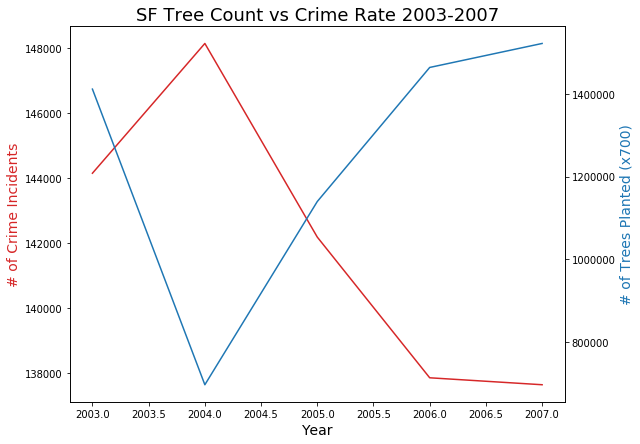

In [101]:
# Plot the Crime Incidents and Trees Planted for 2003-2007 on the the same graph
t = merged2003_2007["Year"]

data1 = merged2003_2007["Crime Incidents"]
data2 = merged2003_2007["Trees Planted"]

fig, ax1 = plt.subplots(figsize=(9, 6))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

color = 'tab:red'
ax1.set_xlabel('Year', size=14)
ax1.set_ylabel('# of Crime Incidents', color=color, size=14)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor="black")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Trees Planted (x700)', color=color, size=14)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor="black")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("SF Tree Count vs Crime Rate 2003-2007", fontsize=18)
plt.savefig("Images/TreevsCrime2003-2007.png")
plt.show()


# 2008-2012 Block

In [17]:
# Load CSV for crime 2008-2012
crime2008_2012 = pd.read_csv("Source CSVs/Crime2008-2012.csv")
# Drop unnamed columns
crime2008_2012 = crime2008_2012.loc[:, ~crime2008_2012.columns.str.contains('^Unnamed')]

In [33]:
# Drop unwanted columns for analysis
newCrime2008_2012 = crime2008_2012.drop(columns =['Incident ID', 'Day', 'Time', 'District', 'Longitude', 'Latitude'])
newCrime2008_2012.head()

,Category,Description,Year
0,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,2012
1,STOLEN PROPERTY,"STOLEN PROPERTY, POSSESSION WITH KNOWLEDGE, RE...",2012
2,WEAPON LAWS,POSS OF LOADED FIREARM,2012
3,OTHER OFFENSES,PAROLE VIOLATION,2012
4,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2012


In [34]:
# Create a group based on the values in the 'Year' column
crimeyears0812_group = newCrime2008_2012.groupby('Year')
# Count every occurance for each year
crime0812_count = crimeyears0812_group['Year'].count()
crime0812_count

Year
2008    141311
2009    139860
2010    133523
2011    132697
2012    140847
Name: Year, dtype: int64

In [20]:
# Create a data frame using the series
crime0812_countdf = pd.DataFrame(crime0812_count)
# Reset the index and rename the 'Year' column
crime0812_countdf = crime0812_countdf.rename(columns={"Year": "Crime Incidents"})
crime0812_countdf = crime0812_countdf.reset_index()
crime0812_countdf

,Year,Crime Incidents
0,2008,141311
1,2009,139860
2,2010,133523
3,2011,132697
4,2012,140847


In [21]:
# Load CSV for trees 2008-2012
trees2008_2012 = pd.read_csv("Source CSVs/SF_Trees2007-2012.csv")
# Drop unnamed columns
trees2008_2012 = trees2008_2012.loc[:, ~trees2008_2012.columns.str.contains('^Unnamed')]

In [22]:
# Drop unwanted columna for analysis
newTrees2008_2012 = trees2008_2012.drop(columns =['Latitude', 'Longitude'])
newTrees2008_2012.head()

,Tree ID,Species,Year
0,102172,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,2012
1,102171,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,2012
2,82730,Tristaniopsis laurina :: Swamp Myrtle,2008
3,82709,Casurina stricta :: Beefwood: Drooping She-Oak,2009
4,103814,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,2009


In [23]:
# Create a group based on the values in the 'Year' column
treeyears0812_group = newTrees2008_2012.groupby('Year')
# Count the number trees planted each year
# Multiply the count to fit the scale of the crime count
tree0812_count = treeyears0812_group['Year'].count() * 40
tree0812_count

Year
2008    171560
2009     71960
2010     42880
2011     59240
2012     38360
Name: Year, dtype: int64

In [24]:
#Create a data frame using the series
tree0812_countdf = pd.DataFrame(tree0812_count)
tree0812_countdf = tree0812_countdf.rename(columns={"Year": "Trees Planted"})
tree0812_countdf = tree0812_countdf.reset_index()
tree0812_countdf

,Year,Trees Planted
0,2008,171560
1,2009,71960
2,2010,42880
3,2011,59240
4,2012,38360


In [25]:
# Merge 2008-2012 blocks for crime and trees
merged2008_2012 = pd.merge(crime0812_countdf, tree0812_countdf, on='Year', how="outer")
merged2008_2012.head()

,Year,Crime Incidents,Trees Planted
0,2008,141311,171560
1,2009,139860,71960
2,2010,133523,42880
3,2011,132697,59240
4,2012,140847,38360


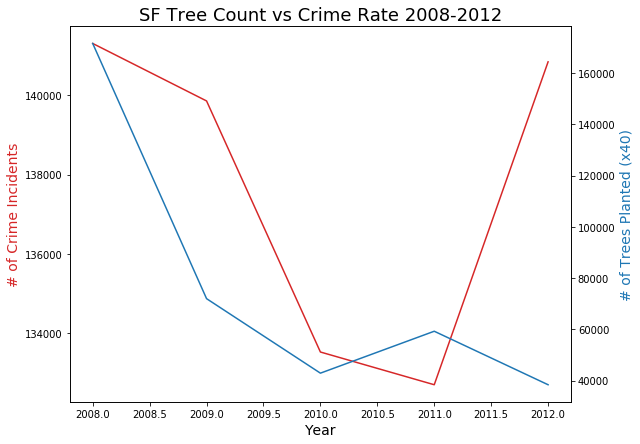

In [103]:
# Plot the Crime Incidents and Trees Planted for 2008-2012 on the the same graph
t = merged2008_2012["Year"]

data1 = merged2008_2012["Crime Incidents"]
data2 = merged2008_2012["Trees Planted"]

fig, ax1 = plt.subplots(figsize=(9, 6))


color = 'tab:red'
ax1.set_xlabel('Year', size=14)
ax1.set_ylabel('# of Crime Incidents', color=color, size=14)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor="black")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Trees Planted (x40)', color=color, size=14)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor="black")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("SF Tree Count vs Crime Rate 2008-2012", fontsize=18)
plt.savefig("Images/TreevsCrime2008-2012.png")
plt.show()

# 2013-2017 Block

In [36]:
# Load CSV for crime 2013-2017
crime2013_2017 = pd.read_csv("Source CSVs/Crime2013-2017.csv")
# Drop unnamed columns 
crime2013_2017 = crime2013_2017.loc[:, ~crime2013_2017.columns.str.contains('^Unnamed')]

In [39]:
# Drop unwanted columns fi=or analysis
newCrime2013_2017 = crime2013_2017.drop(columns =['Incident ID', 'Day', 'Time', 'District', 'Longitude', 'Latitude'])
newCrime2013_2017.head()

,Category,Description,Year
0,ASSAULT,BATTERY,2017
1,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,2017
2,BURGLARY,"BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY",2017
3,WEAPON LAWS,EXHIBITING DEADLY WEAPON IN A THREATING MANNER,2017
4,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2017


In [40]:
# Create a group based on the values in the 'Year' column
crimeyears1317_group = newCrime2013_2017.groupby('Year')
# Count the number of occurances for each year
crime1317_count = crimeyears1317_group['Year'].count()
crime1317_count

Year
2013    152806
2014    150128
2015    156526
2016    150882
2017    154773
Name: Year, dtype: int64

In [41]:
#Create a date frame using the series
crime1317_countdf = pd.DataFrame(crime1317_count)
# Reset index and rename the 'Year' column
crime1317_countdf = crime1317_countdf.rename(columns={"Year": "Crime Incidents"})
crime1317_countdf = crime1317_countdf.reset_index()
crime1317_countdf

,Year,Crime Incidents
0,2013,152806
1,2014,150128
2,2015,156526
3,2016,150882
4,2017,154773


In [42]:
# Load CSV for trees 2013-2017
trees2013_2017 = pd.read_csv("Source CSVs/SF_Trees2013-2017.csv")
# Drop unnamed columns
trees2013_2017 = trees2013_2017.loc[:, ~trees2013_2017.columns.str.contains('^Unnamed')]

In [43]:
# Drop unwanted columns for analysis
newTrees2013_2017 = trees2013_2017.drop(columns =['Latitude', 'Longitude'])
newTrees2013_2017.head()

,Tree ID,Species,Year
0,115737,Acer rubrum :: Red Maple,2016
1,109770,Olea Majestic Beauty ::,2015
2,108715,Pittosporum undulatum :: Victorian Box,2016
3,115538,Crataegus laevigata :: English Hawthorn,2016
4,115537,Crataegus laevigata :: English Hawthorn,2016


In [46]:
# Create a group based on the values in the 'Year' column
treeyears1317_group = newTrees2013_2017.groupby('Year')
# Count how many trees planted each year
tree1317_count = treeyears1317_group['Year'].count() * 100
tree1317_count

Year
2013     79100
2014    114000
2015    194600
2016    165400
2017    157200
Name: Year, dtype: int64

In [48]:
# Create a data frame using the series
tree1317_countdf = pd.DataFrame(tree1317_count)
# Reset index and rename 'Year' column
tree1317_countdf = tree1317_countdf.rename(columns={"Year": "Trees Planted"})
tree1317_countdf = tree1317_countdf.reset_index()
tree1317_countdf

,Year,Trees Planted
0,2013,79100
1,2014,114000
2,2015,194600
3,2016,165400
4,2017,157200


In [49]:
# merge 2013-2017 blocks for crime and trees
merged2013_2017 = pd.merge(crime1317_countdf, tree1317_countdf, on='Year', how="outer")
merged2013_2017.head()

,Year,Crime Incidents,Trees Planted
0,2013,152806,79100
1,2014,150128,114000
2,2015,156526,194600
3,2016,150882,165400
4,2017,154773,157200


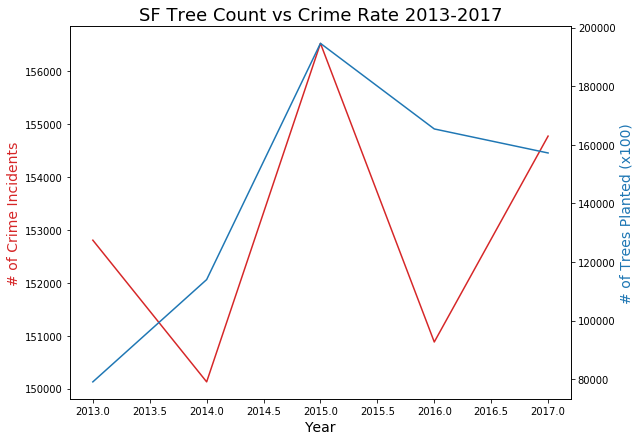

In [104]:
# Plot the Crime Incidents and Trees Planted for 2013-2017 on the the same graph
t = merged2013_2017["Year"]

data1 = merged2013_2017["Crime Incidents"]
data2 = merged2013_2017["Trees Planted"]

fig, ax1 = plt.subplots(figsize=(9, 6))

color = 'tab:red'
ax1.set_xlabel('Year', size=14)
ax1.set_ylabel('# of Crime Incidents', color=color, size=14)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor="black")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Trees Planted (x100)', color=color, size=14)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor="black")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("SF Tree Count vs Crime Rate 2013-2017", fontsize=18)
plt.savefig("Images/TreevsCrime2013-2017.png")
plt.show()